Projet "deep learning" réalisé par Jean-Marius Kombou et Sophie Perrin

Subject of the project : "Submission deadline: March 14th.  The report should be submitted as a Jupyter Notebook converted to a PDF file. To convert your Jupyter Notebook to PDF, please use `nbconvert` to avoid cut-off cells in browser-printed PDFs: https://nbconvert.readthedocs.io/en/latest/.
To submit your report, send it (PDF) to me and in CC Professor Stéphane Chrétien (emails: irina.proskurina@univ-lyon2.fr, stephane.chretien@univ-lyon2.fr). You may write the report in either French or English.

Project topic: image classification.
You can use any image classification dataset from sources such as Kaggle (https://www.kaggle.com/ ), torchvision.datasets (https://pytorch.org/vision/stable/datasets.html ), or any other dataset of your choice.
Project Structure & Grading Criteria:


    Description of the classification problem (1 pt)
    Examples of data and dataset size (2 pts)
    Information about data split statistics (train + validation) (2 pts)
    Results using a Fully Connected Neural Network (5 pts)
    Results using a Convolutional Neural Network (CNN) (5 pts)

Bonus points (+5 pts): Experiment with different optimizers, using a learning rate scheduler or modifying the sizes of neural network layers.
Code quality and documentation will also impact the final grade.


Alternatively, if you have a specific project idea, you may pursue that instead. In this case, add the information about your chosen problem to the Google sheet table above.
If you are interested in a more advanced project, send me an email and I will provide a list of possible topics.
If you have any questions, feel free to contact me by email.





In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
birdy654_cifake_real_and_ai_generated_synthetic_images_path = kagglehub.dataset_download('birdy654/cifake-real-and-ai-generated-synthetic-images')

print('Data source import complete.')


Data source import complete.


In [2]:
'''
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
'''

'\n# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python\n# For example, here\'s several helpful packages to load\n\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n\n# Input data files are available in the read-only "../input/" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" \n# You can also write temporary files to /kaggle/temp/, but they won\'t be saved outside of the current session\n'

In [3]:
TRAIN_PATH = "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train"
TEST_PATH = "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test"

In [4]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from torch import nn
from matplotlib import cm
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Aperçu d'exemples de notre dataset

images réelles
Nom de l'image: 0857 (9).jpg
Dimensions: (32, 32); Mode: RGB
Image array shape: (32, 32, 3)
Nombre de canaux: 3
Nom de l'image: 0063 (5).jpg
Dimensions: (32, 32); Mode: RGB
Image array shape: (32, 32, 3)
Nombre de canaux: 3
Nom de l'image: 0675.jpg
Dimensions: (32, 32); Mode: RGB
Image array shape: (32, 32, 3)
Nombre de canaux: 3
Nom de l'image: 0330 (2).jpg
Dimensions: (32, 32); Mode: RGB
Image array shape: (32, 32, 3)
Nombre de canaux: 3
Nom de l'image: 0915 (6).jpg
Dimensions: (32, 32); Mode: RGB
Image array shape: (32, 32, 3)
Nombre de canaux: 3


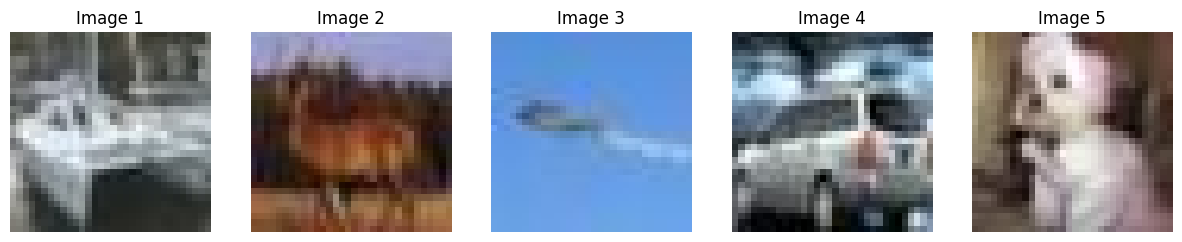

images faites par l'IA
Nom de l'image: 793 (2).jpg
Dimensions: (32, 32); Mode: RGB
Image array shape: (32, 32, 3)
Nombre de canaux: 3
Nom de l'image: 624 (2).jpg
Dimensions: (32, 32); Mode: RGB
Image array shape: (32, 32, 3)
Nombre de canaux: 3
Nom de l'image: 807 (6).jpg
Dimensions: (32, 32); Mode: RGB
Image array shape: (32, 32, 3)
Nombre de canaux: 3
Nom de l'image: 343 (10).jpg
Dimensions: (32, 32); Mode: RGB
Image array shape: (32, 32, 3)
Nombre de canaux: 3
Nom de l'image: 448 (7).jpg
Dimensions: (32, 32); Mode: RGB
Image array shape: (32, 32, 3)
Nombre de canaux: 3


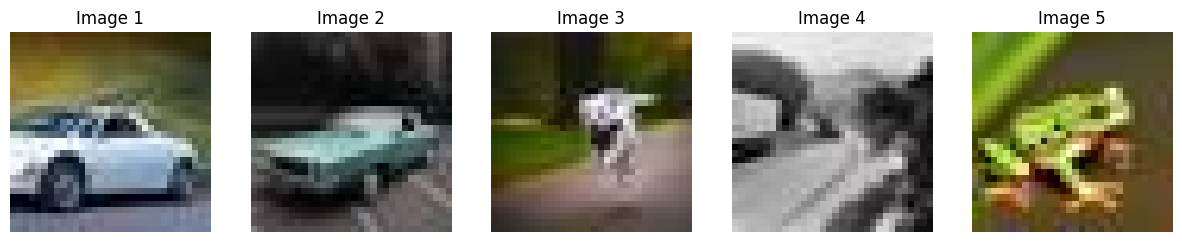

sobel sur les images réelles


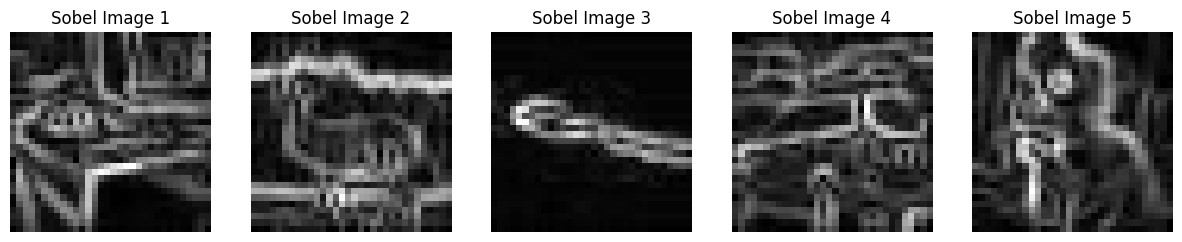

sobel sur les images faites par l'IA


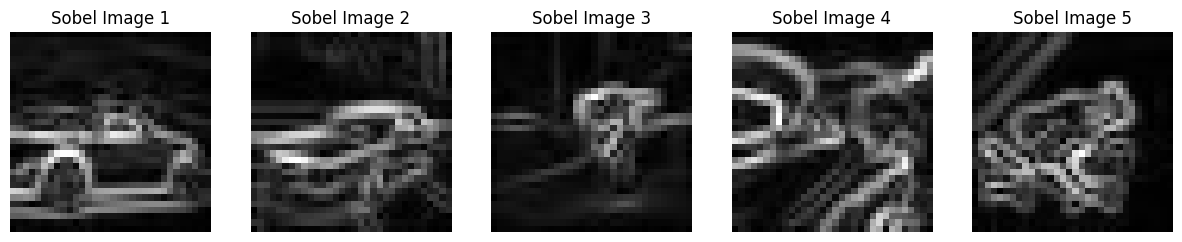

In [5]:
# Installer Pillow si ce n'est pas déjà fait
# !pip install Pillow
from PIL import Image
import IPython.display as display
import os
import random
import cv2  # Pour l'application de l'opérateur de Sobel

# Fonction pour afficher des images aléatoires pour chaque classe
def display_random_images_from_folder(folder_path, num_images=5):
    # Obtenir la liste des fichiers dans le dossier
    image_files = os.listdir(folder_path)

    # Sélectionner aléatoirement des fichiers
    selected_files = random.sample(image_files, num_images)

    images = []  # Liste pour stocker les images chargées

    # Créer une figure pour afficher les images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i, image_file in enumerate(selected_files):
        # Charger l'image avec PIL
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path)

        # Convertir l'image en tableau numpy
        img_matrix = np.array(img)

        # Ajouter l'image à la liste
        images.append(img_matrix)

        # Afficher l'image
        axes[i].imshow(img_matrix)
        axes[i].axis('off')
        axes[i].set_title(f"Image {i + 1}")

        # Afficher des informations sur l'image
        num_channels = img_matrix.shape[-1] if len(img_matrix.shape) == 3 else 1
        print(f"Nom de l'image: {image_file}")
        print(f"Dimensions: {img.size}; Mode: {img.mode}")
        print(f"Image array shape: {img_matrix.shape}")
        print(f"Nombre de canaux: {num_channels}")


    # Afficher le tout
    plt.show()
    return images  # Retourner la liste des images pour un traitement ultérieur

# fonction pour appliquer l'opérateur de Sobel aux images déjà chargées
def apply_sobel(images):
    sobel_images = []  # Liste pour stocker les images traitées par Sobel

    # Appliquer Sobel à chaque image
    for i, img in enumerate(images):
        # Convertir l'image en niveaux de gris pour appliquer Sobel
        gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        # Appliquer l'opérateur de Sobel pour la détection des bords
        sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Détection des bords en X
        sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Détection des bords en Y

        # Calculer le gradient combiné
        sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)

        sobel_images.append(sobel_combined)  # Ajouter l'image Sobel traitée à la liste

    # Affichage des résultats
    fig, axes = plt.subplots(1, len(sobel_images), figsize=(15, 5))

    for i, sobel_img in enumerate(sobel_images):
        axes[i].imshow(sobel_img, cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f"Sobel Image {i + 1}")

    # Afficher le tout
    plt.show()

# Exemple : afficher des images aléatoires dans le répertoire "REAL"
folder_path_real = "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/REAL/"
print("images réelles")
real_ech=display_random_images_from_folder(folder_path_real)
folder_path_fake = "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/FAKE/"
print("images faites par l'IA")
fake_ech=display_random_images_from_folder(folder_path_fake)

print("sobel sur les images réelles")
apply_sobel(real_ech)
print("sobel sur les images faites par l'IA")
apply_sobel(fake_ech)

L’opérateur de convolution de Sobel est un filtre de détection de contours, qui est, le plus souvent, utilisé en prétraitement d’images. Il permet de détecter les gradients d’intensité dans une image, c'est-à-dire les zones où il y a des changements brusques de luminosité (qui sont souvent associées aux bords des objets).

Cet opérateur applique deux convolutions séparées sur l'image :

   - Une convolution avec un filtre de dérivée en direction horizontale - ce filtre met en évidence les contours horizontaux
   - Une convolution avec un filtre de dérivée en direction verticale - ce filtre met en évidence les contours verticaux
   
Chacun de ces deux "filtres" est une matrice 3×3 (un "kernel"), qu'on applique à chaque pixel de l'image.
La convolution de Sobel est en fait une convolution "pré-entrainée" pour détecter certains patterns.

# Division des données en jeu d'entraînement et jeu de test

Les images cifake sont déjà divisées en jeu d'entraînement et jeu de test directement dans le dataset fourni par Kaggle.

On peut cependant se poser la question de la qualité de cette division, qui n'a pas été faite par nos soins.

In [6]:
import os

# Fonction pour compter les images dans un dossier
def count_images_in_folder(folder_path):
    # Lister tous les fichiers dans le dossier et filtrer ceux qui sont des images
    images = [f for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp', 'tiff'))]
    return len(images)

# Fonction pour compter les images dans tous les sous-dossiers
def count_images_in_subfolders(parent_folder_path):
    subfolders = [f.path for f in os.scandir(parent_folder_path) if f.is_dir()]

    # Compter les images dans chaque sous-dossier
    for subfolder in subfolders:
        subfolder_images_count = count_images_in_folder(subfolder)
        print(f"Nombre d'images dans le dossier '{subfolder}': {subfolder_images_count}")

# Compter les images dans les dossiers 'train' et 'test' ainsi que dans leurs sous-dossiers
print("### Compte des images dans le dossier TRAIN ###")
count_images_in_subfolders(TRAIN_PATH)

print("\n### Compte des images dans le dossier TEST ###")
count_images_in_subfolders(TEST_PATH)

### Compte des images dans le dossier TRAIN ###
Nombre d'images dans le dossier '/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/FAKE': 50000
Nombre d'images dans le dossier '/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/REAL': 50000

### Compte des images dans le dossier TEST ###
Nombre d'images dans le dossier '/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/FAKE': 10000
Nombre d'images dans le dossier '/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/REAL': 10000


Nous avons donc 100 000 images dans le train set, réparties de manière parfaitement équilibrée entre nos deux classes (générée par AI : classe ""FAKE" / naturelle : classe "REAL"), puisque chacune d'elle représente exactement 50% du train set.

Nous avons 20 000 images dans le test set, donc cet ensemble de test représente 17 % du total des 120 000 images (train + test). Il est lui aussi parfaitement équilibré entre les deux classes, chacune d'elle réprésentant exactement 50% de cet ensemble de test.

Finalement, chaque classe est représentée de manière proportionnelle dans les ensembles d'entraînement et de test, en plus d'être équilibrée : nous avons ici l'équivalent d'un train_test_split de scikit-learn avec l'option stratify=y (où y désignerait les classes).

C'est en raison de cet échantillonnage optimal des exemples pour un modèle de classification, et du nombre suffisamment important de ces derniers, que nous avons choisi ce jeu de données parmi les différents jeux de données "images IA" de Kaggle.

# Préparation des données avec les dataloaders pour nos deux modèles

In [7]:

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Définition des transformations : normalisation et conversion en tenseur
transform = transforms.Compose([
    #transforms.Resize((32, 32)),  # Redimensionner au format CIFAR-10 - dans notre cas cette étape semble inutile, les images
    #étant déjà en format 32*32
    transforms.ToTensor(),        # Convertir en tenseur PyTorch
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalisation : comme nos images sont en couleur, il
    #y a trois paramètres pour la moyenne, et de même pour l'écart-type, dans transforms.Normalize(moyenne, écart-type).
    #Il s'agit d'une normalisation par centrage-réduction autour de la moyenne.
    #Ici, on a pris chaque moyenne = 0.5, et chaque écart-type = 0.5, puisque la transformation en tenseur de l'image
    #a eu pour résultat qu'elle soit désormais encodée avec des valeurs comprises entre 0 et 1.
    #La normalisation nous ramène donc ici à des valeurs comprises entre -1 et 1.
    #La normalisation rend la convergence des réseaux de neurones plus rapide sur les données, et limite les problèmes de
    #vanishing et exploding gradient.
])

# Chargement des datasets
train_dataset = datasets.ImageFolder(root=TRAIN_PATH, transform=transform)
test_dataset = datasets.ImageFolder(root=TEST_PATH, transform=transform)

# Création des DataLoaders pour optimiser le chargement des données
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True) #shuffle = True : pour l'entraînement, on mélange les données, afin que le modèle ne puisse pas
#apprendre des patterns liés à l'ordre des données (le shuffle lors de l'entraînement améliore ainsi la généralisation du modèle. Il réduit aussi la corrélation entre les exemples successifs,
#et aide également à l'optimisation en évitant que le modèle ne converge trop rapidement vers un minimum local)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Vérification des classes
print("Classes détectées :", train_dataset.classes)

#et des labels
print("Mapping des labels :", train_dataset.class_to_idx)


Classes détectées : ['FAKE', 'REAL']
Mapping des labels : {'FAKE': 0, 'REAL': 1}


Le dataloader permet de charger les données (ici, nos images) par batchs dans le modèle.
Ici, nous avons pris des batchs de taille 32.

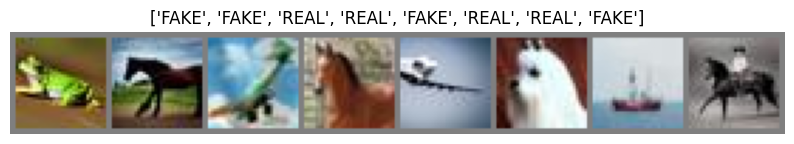

In [8]:

# Récupérer un batch d'images et leurs labels
dataiter = iter(train_loader)
images, labels = next(dataiter)  # Prend un batch

# Fonction pour dé-normaliser et convertir en image affichable
def imshow(img):
    img = img / 2 + 0.5  # Dé-normalisation : on repasse dans [0,1]
    npimg = img.numpy()  # Convertir en numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Réorganiser les dimensions
    plt.axis('off')

# Affichage des images
plt.figure(figsize=(10,5))
imshow(torchvision.utils.make_grid(images[:8]))  # Afficher 8 images en grille
plt.title([train_dataset.classes[label] for label in labels[:8]])  # Labels
plt.show()

# Modèle fully connected

On construit un réseau de neurones "fully connected" avec deux couches de neurones (3072 entrées et une couche cachée de 128 neurones) :

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class FullyConnectedNN(nn.Module):
    def __init__(self, input_size=3072, hidden_size=128):
        super(FullyConnectedNN, self).__init__()

        # Première couche fully connected (entrée -> couche cachée)
        self.fc1 = nn.Linear(input_size, hidden_size)

        # Deuxième couche fully connected (couche cachée -> sortie)
        self.fc2 = nn.Linear(hidden_size, 1)  # Sortie binaire, donc 1 neurone

    def forward(self, x):
        # Aplatir les images en un vecteur
        x = torch.flatten(x, 1)

        # Première couche fully connected avec ReLU
        x = F.relu(self.fc1(x))

        # Deuxième couche fully connected avec Sigmoid pour la classification binaire
        x = torch.sigmoid(self.fc2(x))

        return x

input_size = 32 * 32 * 3  # images 32x32 avec 3 canaux (RGB)
model = FullyConnectedNN(input_size)

On confectionne ensuite une fonction qui crée les graphiques représentant l'évolution de la loss et de l'accuracy selon les epoch, pour les ensembles d'entraînement et de test ;
on confectionne aussi la fonction pour entraîner le modèle sur 10 epoch, puis le faire tourner sur l'ensemble de test pour évaluer ses performances :

In [10]:
from IPython.display import clear_output
import torch
from tqdm import tqdm

sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 15})

def plot_losses(train_losses, test_losses, train_accuracies, test_accuracies):
    """Affiche les courbes de perte et d'accuracy."""
    clear_output(wait=True)

    fig, axs = plt.subplots(1, 2, figsize=(13, 4))

    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(test_losses) + 1), test_losses, label='test')
    axs[0].set_ylabel('Loss')

    axs[1].plot(range(1, len(train_accuracies) + 1), train_accuracies, label='train')
    axs[1].plot(range(1, len(test_accuracies) + 1), test_accuracies, label='test')
    axs[1].set_ylabel('Accuracy')

    for ax in axs:
        ax.set_xlabel('Epoch')
        ax.legend()

    plt.show()

def train(model, optimizer, train_dataloader, val_dataloader, n_epochs=10, wandb_project=None):
    """Entraîne le modèle fully connected sur CIFAKE."""

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    if wandb_project:
        import wandb
        wandb.init(project=wandb_project)
        wandb.watch(model)

    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    criterion = nn.BCELoss()  # Perte pour classification binaire

    for epoch in range(n_epochs):
        model.train()
        batch_losses = []
        batch_accuracies = []

        for x_train, y_train in tqdm(train_dataloader, desc=f"Training Epoch {epoch + 1}/{n_epochs}"):
            x_train, y_train = x_train.to(device), y_train.to(device).float().view(-1, 1)

            # Aplatir les images pour l'entrée dans le modèle Fully Connected
            x_train = x_train.view(x_train.size(0), -1)  # [batch_size, channels*height*width]

            y_pred = model(x_train)
            y_pred = torch.sigmoid(y_pred)  # Activation pour BCE Loss

            loss = criterion(y_pred, y_train)

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            batch_losses.append(loss.item())
            batch_accuracies.extend(((y_pred > 0.5) == y_train).cpu().numpy())  # Seuil à 0.5

        train_losses.append(np.mean(batch_losses))
        train_accuracies.append(np.mean(batch_accuracies))

        model.eval()
        val_loss = []
        val_accuracy = []

        with torch.no_grad():
            for x_val, y_val in tqdm(val_dataloader, desc="Validation", leave=False):
                x_val, y_val = x_val.to(device), y_val.to(device).float().view(-1, 1)

                # Aplatir les images pour l'entrée dans le modèle Fully Connected
                x_val = x_val.view(x_val.size(0), -1)  # [batch_size, channels*height*width]

                y_pred = model(x_val)
                y_pred = torch.sigmoid(y_pred)

                loss = criterion(y_pred, y_val)

                val_loss.append(loss.item())
                val_accuracy.extend(((y_pred > 0.5) == y_val).cpu().numpy())

        test_losses.append(np.mean(val_loss))
        test_accuracies.append(np.mean(val_accuracy))

        if wandb_project:
            wandb.log(
                {
                    "train loss": train_losses[-1],
                    "train accuracy": train_accuracies[-1],
                    "val loss": test_losses[-1],
                    "val accuracy": test_accuracies[-1],
                }
            )

        plot_losses(train_losses, test_losses, train_accuracies, test_accuracies)
        print(
            f"Epoch {epoch + 1}/{n_epochs} | "
            f"Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f} | "
            f"Val Loss: {test_losses[-1]:.4f}, Val Accuracy: {test_accuracies[-1]:.4f}"
        )


On effectue l'entraînement du modèle, et on visionne ses résultats :

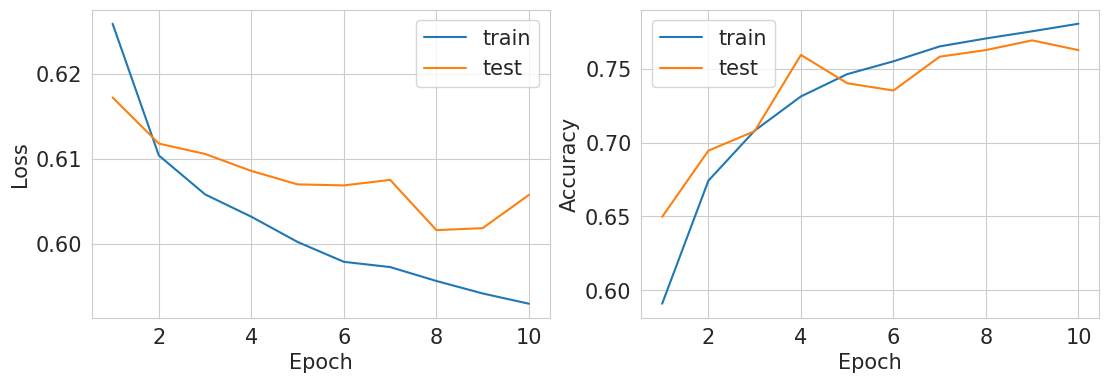

Epoch 10/10 | Train Loss: 0.5929, Train Accuracy: 0.7804 | Val Loss: 0.6057, Val Accuracy: 0.7625


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation de : {device}")

model = FullyConnectedNN()
model.to(device)

# Choisir un optimiseur
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Entraînement du modèle
train(model, optimizer, train_loader, test_loader, n_epochs=10)

Sur l'ensemble d'entraînement, la loss décroît clairement au fur et à mesure des epoch. Ce n'est pas le cas pour l'ensemble de test : à partir de la 4e epoch, elle stagne, ce qui montre un possible début de surapprentissage du modèle sur les données d'entraînement.
L'accuracy croit sans discontinuer au fil des epochs. Cependant, tant pour l'ensemble de test que pour l'ensemble d'entraînement, elle ne dépasse pas les 0.8 au bout de 10 epochs : 2 images sur 10 ne sont pas correctement classifiées par notre modèle.

Précision sur le test set : 0.7625

Rapport de classification :
               precision    recall  f1-score   support

        Réel       0.82      0.67      0.74     10000
          IA       0.72      0.85      0.78     10000

    accuracy                           0.76     20000
   macro avg       0.77      0.76      0.76     20000
weighted avg       0.77      0.76      0.76     20000



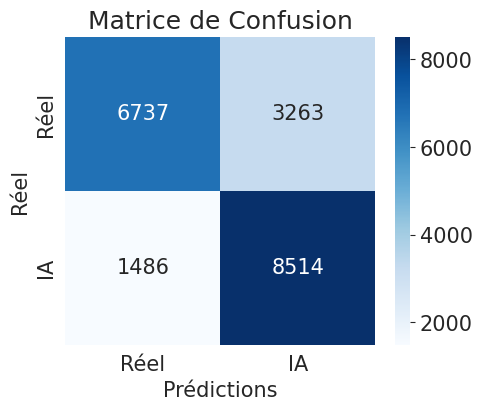

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Mode évaluation
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = torch.sigmoid(model(images))  # Sigmoid pour transformer en proba
        preds = (outputs > 0.5).int().cpu()  # Seuil 0.5 pour classification binaire

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.numpy())

# Accuracy et rapport détaillé
accuracy = accuracy_score(y_true, y_pred)
print(f"Précision sur le test set : {accuracy:.4f}\n")
print("Rapport de classification :\n", classification_report(y_true, y_pred, target_names=["Réel", "IA"]))

# Matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Réel", "IA"], yticklabels=["Réel", "IA"])
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()

Les performances sont bien homogènes selon les classes, et le F1 score est également proche de 0.8.

# Modèle convolutif

Nous allons maintenant mettre en oeuvre un réseau de neurones convolutif, qui a plusieurs avantages sur le fully connected que nous venons de tester :

- Un réseau convolutif utilise moins de paramètres, donc moins de mémoire et de calcul, qu'un réseau fully connected, grâce aux poids partagés via les filtres (kernels). C'est particulièrement sensible sur de plus grandes images.
  
- Il exploite les relations spatiales entre pixels, ce que ne peut pas faire le réseau "fully connected". En effet, un réseau fully connected utilise un filtre (kernel), qui extrait des caractéristiques locales en glissant sur l’image, et détecte ainsi des motifs simples (bords, textures), puis des motifs plus complexes (formes, objets). Le filtre convolutif de Sobel utilisé plus haut sur un échantillon d'images est un exemple de tel filtre.
Le réseau "fully connected", lui, écrase la structure spatiale, car il ne peut que traiter tous les pixels comme une longue liste de valeurs. Il apprend donc la position relative des pixels sans notion de proximité, ce qui rend plus difficile pour lui l'apprentissage de patterns.

-  De ce fait, les CNN sont robustes aux déplacements des objets dans l’image : grâce aux kernels, une caractéristique sera détectée partout dans l’image, pas juste à un endroit précis.
Et avec le max pooling, un CNN apprend des représentations invariantes aux translations.
Un objet reconnaissable déplacé dans l’image sera toujours détecté, quelle que soit sa position dans cette image.
Par contraste, Un réseau fully connected apprenant chaque position indépendamment, s’il voit un objet dans une position différente, il peut échouer à le reconnaître.

Il s'ensuit qu'un CNN généralise mieux, pour ce qui est de l'analyse et classification d'images, qu'un réseau fully connected.

Ici, on construit un réseau de neurones convolutionnel à deux couches :

In [13]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Bloc 1 : Conv -> ReLU -> Pooling
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        #Conv2d(3, 32, 3, padding=1) → 3 canaux RGB en entrée, 32 filtres, kernel 3x3.
        #MaxPool2d(2, 2) → Réduit la taille de moitié après chaque conv
        #Les images passent de 32x32 → 16x16 → 8x8 avant d’entrer en fully connected.
        # Bloc 2 : Conv -> ReLU -> Pooling
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # 64 channels * 8x8 images après le pooling
        self.fc2 = nn.Linear(128, 1)  # Sortie binaire

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Bloc 1
        x = self.pool(F.relu(self.conv2(x)))  # Bloc 2

        x = torch.flatten(x, 1)  # Aplatir pour passer la couche fully connected
        x = F.relu(self.fc1(x))  # Couche dense
        x = torch.sigmoid(self.fc2(x))  # Sortie avec sigmoide pour classification binaire

        return x

In [14]:
from IPython.display import clear_output
import torch
import torch.nn.functional as F
from tqdm import tqdm

sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 15})


def plot_losses(train_losses, test_losses, train_accuracies, test_accuracies):
    """Affiche les courbes de perte et d'accuracy."""
    clear_output(wait=True)

    fig, axs = plt.subplots(1, 2, figsize=(13, 4))

    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(test_losses) + 1), test_losses, label='test')
    axs[0].set_ylabel('Loss')

    axs[1].plot(range(1, len(train_accuracies) + 1), train_accuracies, label='train')
    axs[1].plot(range(1, len(test_accuracies) + 1), test_accuracies, label='test')
    axs[1].set_ylabel('Accuracy')

    for ax in axs:
        ax.set_xlabel('Epoch')
        ax.legend()

    plt.show()


def train(model, optimizer, train_dataloader, val_dataloader, n_epochs=10, wandb_project=None):
    """Entraîne le modèle convolutif sur CIFAKE."""

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    if wandb_project:
        import wandb
        wandb.init(project=wandb_project)
        wandb.watch(model)

    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    criterion = nn.BCELoss()  # Perte pour classification binaire

    for epoch in range(n_epochs):
        model.train()
        batch_losses = []
        batch_accuracies = []

        for x_train, y_train in tqdm(train_dataloader, desc=f"Training Epoch {epoch + 1}/{n_epochs}"):
            x_train, y_train = x_train.to(device), y_train.to(device).float().view(-1, 1)

            y_pred = model(x_train)
            y_pred = torch.sigmoid(y_pred)  # Activation pour BCE Loss

            loss = criterion(y_pred, y_train)

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            batch_losses.append(loss.item())
            batch_accuracies.extend(((y_pred > 0.5) == y_train).cpu().numpy())  # Seuil à 0.5

        train_losses.append(np.mean(batch_losses))
        train_accuracies.append(np.mean(batch_accuracies))

        model.eval()
        val_loss = []
        val_accuracy = []

        with torch.no_grad():
            for x_val, y_val in tqdm(val_dataloader, desc="Validation", leave=False):
                x_val, y_val = x_val.to(device), y_val.to(device).float().view(-1, 1)

                y_pred = model(x_val)
                y_pred = torch.sigmoid(y_pred)

                loss = criterion(y_pred, y_val)

                val_loss.append(loss.item())
                val_accuracy.extend(((y_pred > 0.5) == y_val).cpu().numpy())

        test_losses.append(np.mean(val_loss))
        test_accuracies.append(np.mean(val_accuracy))

        if wandb_project:
            wandb.log(
                {
                    "train loss": train_losses[-1],
                    "train accuracy": train_accuracies[-1],
                    "val loss": test_losses[-1],
                    "val accuracy": test_accuracies[-1],
                }
            )

        plot_losses(train_losses, test_losses, train_accuracies, test_accuracies)
        print(
            f"Epoch {epoch + 1}/{n_epochs} | "
            f"Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f} | "
            f"Val Loss: {test_losses[-1]:.4f}, Val Accuracy: {test_accuracies[-1]:.4f}"
        )


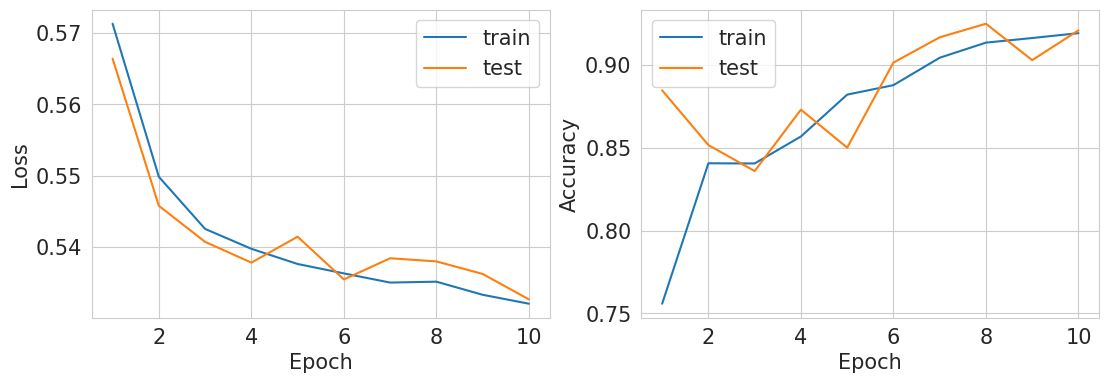

Epoch 10/10 | Train Loss: 0.5321, Train Accuracy: 0.9190 | Val Loss: 0.5327, Val Accuracy: 0.9206


In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation de : {device}")

model = CNN()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train(model, optimizer, train_loader, test_loader, n_epochs=10)

Cette fois, la loss baisse de la même façon pour l'ensemble de test et l'ensemble d'entraînement (sauf à la fin pour cette dernière mise en oeuvre avant le rendu) : il n'y a pas de début de surapprentissage avec notre CNN, contrairement à ce qui se passait avec le réseau fully connected !

De plus, dès les premières epochs, cette loss est plus réduite que pour le réseau fully connected. In fine, à l'epoch 10, elle n'est plus que de 0.53 pour l'ensemble d'entrainement (contre 0.59 avec le fully connected), et de 0.54 pour l'ensemble de test (contre 0.61 avec le fully connected).

L'accuracy démarre, dès la première epoch, quasiment au niveau où le fully connected parvenait quant à lui après 10 epoch : 0.74 !
Elle dépasse 0.9, tant pour l'ensemble d'entrainement que pour l'ensemble de test, au bout de 10 epochs.

Ceci confirme la supériorité des CNN en matière d'images : absence de surapprentissage, et accuracy meilleure (dès les premières epochs ici).

Précision sur le test set : 0.9206

Rapport de classification :
               precision    recall  f1-score   support

        Réel       0.97      0.87      0.92     10000
          IA       0.88      0.97      0.92     10000

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



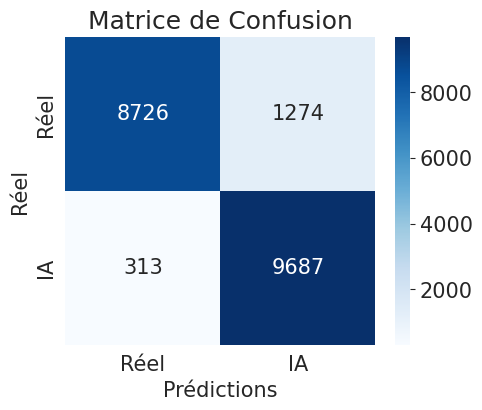

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Mode évaluation
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = torch.sigmoid(model(images))  # Sigmoid pour transformer en proba
        preds = (outputs > 0.5).int().cpu()  # Seuil 0.5 pour classification binaire

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.numpy())

# Accuracy et rapport détaillé
accuracy = accuracy_score(y_true, y_pred)
print(f"Précision sur le test set : {accuracy:.4f}\n")
print("Rapport de classification :\n", classification_report(y_true, y_pred, target_names=["Réel", "IA"]))

# Matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Réel", "IA"], yticklabels=["Réel", "IA"])
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()

# Essais de modification du modèle CNN


Modification du learning rate (on le réduit tous les 5 epochs, pour améliorer la vitesse de convergence) :

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)  # Réduit le learning rate de moitié tous les 5 epochs

train(model, optimizer, train_loader, test_loader, n_epochs=20)

scheduler.step()  # Mise à jour du learning rate

De manière manifeste, cela ne produit pas une amélioration du modèle dans ce cas précis : cela produit une situation de surrapprentissage. En effet, la loss de l'ensemble de test, ainsi que son accuraccy, sont quasiment stationaires (voire ont des pics "accidentés"), cependant que la loss du train set et son accuraccy "évoluent dans le sens attendu pour un bon modèle" - ou bien, comme dans cette dernière exécution pour le rendu, stagnent eux aussi, montrant possiblement une convergence rapide vers un minimum local (learning rate trop élevé - mais il est pourtant identique à celui du CNN au départ), ou bien une situation de surapprentissage extrême dès le départ.

Modification du modèle : on lui ajoute une couche, ce qui peut améliorer l'apprentissage. On lui ajoute aussi une normalisation par batch norm, qui peut stabiliser l'entraînement (en réduisant la variance interne des activations) et peut aussi accélérer la convergence en effectuant une normalisation de nos batchs.

Lors de l'entraînement, pour chaque mini-batch de données d'entrée X, BatchNorm applique une standardisation sur les valeurs des features du mini-batch, et recalibre ensuite les valeurs de l'estimation de y via des paramètres apprenables.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN_2(nn.Module):
    def __init__(self):
        super(CNN_2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # BatchNorm
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # BatchNorm
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)  # BatchNorm

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(128 * 4 * 4, 256)  # couche fully connected
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))

        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
from IPython.display import clear_output
import torch
import torch.nn.functional as F
from tqdm import tqdm

sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 15})


def plot_losses(train_losses, test_losses, train_accuracies, test_accuracies):
    """Affiche les courbes de perte et d'accuracy."""
    clear_output(wait=True)

    fig, axs = plt.subplots(1, 2, figsize=(13, 4))

    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(test_losses) + 1), test_losses, label='test')
    axs[0].set_ylabel('Loss')

    axs[1].plot(range(1, len(train_accuracies) + 1), train_accuracies, label='train')
    axs[1].plot(range(1, len(test_accuracies) + 1), test_accuracies, label='test')
    axs[1].set_ylabel('Accuracy')

    for ax in axs:
        ax.set_xlabel('Epoch')
        ax.legend()

    plt.show()


def train(model, optimizer, train_dataloader, val_dataloader, n_epochs=10, wandb_project=None):
    """Entraîne le modèle convolutif avec BatchNorm sur CIFAKE."""

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    if wandb_project:
        import wandb
        wandb.init(project=wandb_project)
        wandb.watch(model)

    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    criterion = nn.BCELoss()  # Perte pour classification binaire

    for epoch in range(n_epochs):
        model.train()
        batch_losses = []
        batch_accuracies = []

        for x_train, y_train in tqdm(train_dataloader, desc=f"Training Epoch {epoch + 1}/{n_epochs}"):
            x_train, y_train = x_train.to(device), y_train.to(device).float().view(-1, 1)

            y_pred = model(x_train)
            y_pred = torch.sigmoid(y_pred)  # Activation pour BCE Loss

            loss = criterion(y_pred, y_train)

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            batch_losses.append(loss.item())
            batch_accuracies.extend(((y_pred > 0.5) == y_train).cpu().numpy())  # Seuil à 0.5

        train_losses.append(np.mean(batch_losses))
        train_accuracies.append(np.mean(batch_accuracies))

        model.eval()
        val_loss = []
        val_accuracy = []

        with torch.no_grad():
            for x_val, y_val in tqdm(val_dataloader, desc="Validation", leave=False):
                x_val, y_val = x_val.to(device), y_val.to(device).float().view(-1, 1)

                y_pred = model(x_val)
                y_pred = torch.sigmoid(y_pred)

                loss = criterion(y_pred, y_val)

                val_loss.append(loss.item())
                val_accuracy.extend(((y_pred > 0.5) == y_val).cpu().numpy())

        test_losses.append(np.mean(val_loss))
        test_accuracies.append(np.mean(val_accuracy))

        if wandb_project:
            wandb.log(
                {
                    "train loss": train_losses[-1],
                    "train accuracy": train_accuracies[-1],
                    "val loss": test_losses[-1],
                    "val accuracy": test_accuracies[-1],
                }
            )

        plot_losses(train_losses, test_losses, train_accuracies, test_accuracies)
        print(
            f"Epoch {epoch + 1}/{n_epochs} | "
            f"Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f} | "
            f"Val Loss: {test_losses[-1]:.4f}, Val Accuracy: {test_accuracies[-1]:.4f}"
        )


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation de : {device}")

model = CNN_2()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train(model, optimizer, train_loader, test_loader, n_epochs=10)

Le modèle gagne grandement en efficacité prédictive, puisque dès le premier epoch, on atteint déjà l'accuraccy atteinte au bout de 10 epochs avec le CNN à 2 couches.
La loss commence, pour le premier epoch, à moins de 0.25, alors qu'au bout des dix epochs pour le CNN à 2 couches, cette loss était encore de 0.53, tant pour le train set que pour le jeu de test.

Au bout de 10 epochs, nous atteignons ici une accuracy de 0.96 pour l'ensemble de test (et 0.98 pour l'ensemble d'entrainement) : notre modèle reconnaît correctement 96 images sur 100 !
Cependant, nous pouvons observer que la loss de l'ensemble de test commence à stagner (et a même un "gros accident" entre la 6e et 8e epoch lors de la dernière exécution avant transmission de ce projet à notre enseignante), signe d'un possible début de surrapprentissage qui doit amener à la prudence.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Mode évaluation
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = torch.sigmoid(model(images))  # Sigmoid pour transformer en proba
        preds = (outputs > 0.5).int().cpu()  # Seuil 0.5 pour classification binaire

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.numpy())

# Accuracy et rapport détaillé
accuracy = accuracy_score(y_true, y_pred)
print(f"Précision sur le test set : {accuracy:.4f}\n")
print("Rapport de classification :\n", classification_report(y_true, y_pred, target_names=["Réel", "IA"]))

# Matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Réel", "IA"], yticklabels=["Réel", "IA"])
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()

Au vu de ces résultats, nous pouvons retenir ce modèle comme celui ayant les performances les plus intéressantes, malgré le point de vigilance, qui serait à traiter pour encore l'améliorer, sur un possible début de surrapprentissage.